## `Importing Libraries and Loading Dataset`

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
df = pd.read_csv("Netflix Dataset.csv")

df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7.19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23.59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [44]:
print("The shape of the Netflix Dataset is", df.shape)

The shape of the Netflix Dataset is (7789, 11)


### Describing the Dataset

In [45]:
print(df.describe())

       Show_Id Category              Title                Director  \
count     7789     7789               7789                    5401   
unique    7787        2               7787                    4050   
top      s6621    Movie  The Lost Okoroshi  Raúl Campos, Jan Suter   
freq         2     5379                  2                      18   

                      Cast        Country     Release_Date Rating  Duration  \
count                 7071           7282             7779   7782      7789   
unique                6831            681             1565     14       216   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    18           2556              118   2865      1608   

                 Type                                        Description  
count            7789                                               7789  
unique            492                                               7769  
top     Documentaries  Multi

This shows that there is only 1 numeric column in our Dataset.

### Checking Datatype of each column

In [46]:
print(df.dtypes)

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object


### Checking for Null Values

In [47]:
print(df.isnull().sum())

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


## `Data Cleaning and Formatting`

In [48]:
df["Director"].fillna("No Data", inplace = True)
df["Cast"].fillna("No Data", inplace = True)

df["Country"].fillna(df["Country"].mode()[0], inplace = True)
df["Release_Date"].fillna(df["Release_Date"].mode()[0], inplace = True)
df["Rating"].fillna(df["Rating"].mode()[0], inplace = True)

print(df.isnull().sum())

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64


/tmp/ipython-input-3870495182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Director"].fillna("No Data", inplace = True)
/tmp/ipython-input-3870495182.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [49]:
print(df.Release_Date)

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7784      October 19, 2020
7785         March 2, 2019
7786    September 25, 2020
7787      October 31, 2020
7788         March 1, 2020
Name: Release_Date, Length: 7789, dtype: object


### Correcting Date formats

In [50]:
# Strip extra spaces from strings
df['Release_Date'] = df['Release_Date'].str.strip()

# Convert to datetime with automatic format inference
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year
df['year_added'] = df['Release_Date'].dt.year


In [51]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year_added
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7.19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23.59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


## `Data Analysis and Visualization`

### Checking Percentage of TV shows and Movies

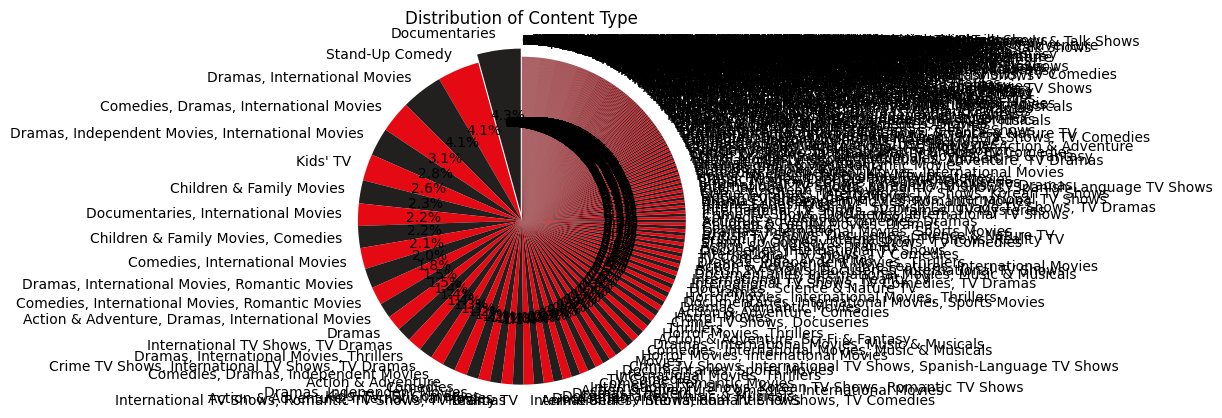

In [52]:
type_show = df["Type"].value_counts()
show = type_show.index
count = type_show.values

# Make explode same length as count
explode = [0.05 if i == 0 else 0 for i in range(len(count))]

color = ["#221f1f", "#E50914"]  # If you have only 2 colors but more slices, matplotlib will repeat them automatically

plt.pie(count, labels=show, autopct="%.1f%%", colors=color, explode=explode, startangle=90)
plt.axis("equal")
plt.title("Distribution of Content Type")
plt.show()

### Top 10 Countries with the most content

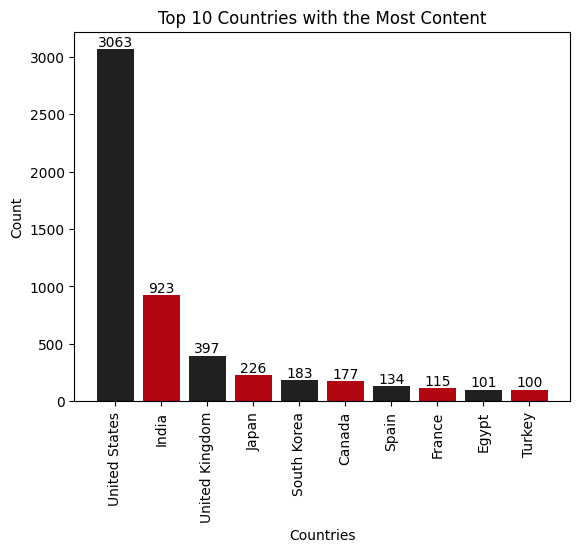

In [53]:
top_10 = df["Country"].value_counts().head(10)
countries = top_10.index
show_count = top_10.values

colors = ["#221f1f" if i % 2 == 0 else "#b20710" for i in range(len(countries))]

plt.bar(countries, show_count, color = colors)
plt.xticks(rotation = 90)
plt.title("Top 10 Countries with the Most Content")
plt.xlabel("Countries")
plt.ylabel("Count")

for i, v in enumerate(show_count):
    plt.text(i, v, str(v), ha = "center", va = "bottom")

plt.show()

### Content added over years

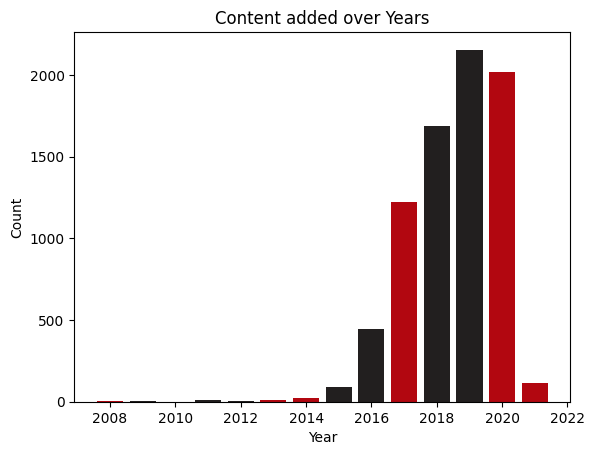

In [54]:
most_cont = df["year_added"].value_counts()
year = most_cont.index
value = most_cont.values

colors = ["#221f1f" if i % 2 == 0 else "#b20710" for i in range(len(year))]

plt.bar(year, value, color = colors)
plt.title("Content added over Years")
plt.xlabel("Year")
plt.ylabel("Count")

plt.show()

### Most Popular Content in India

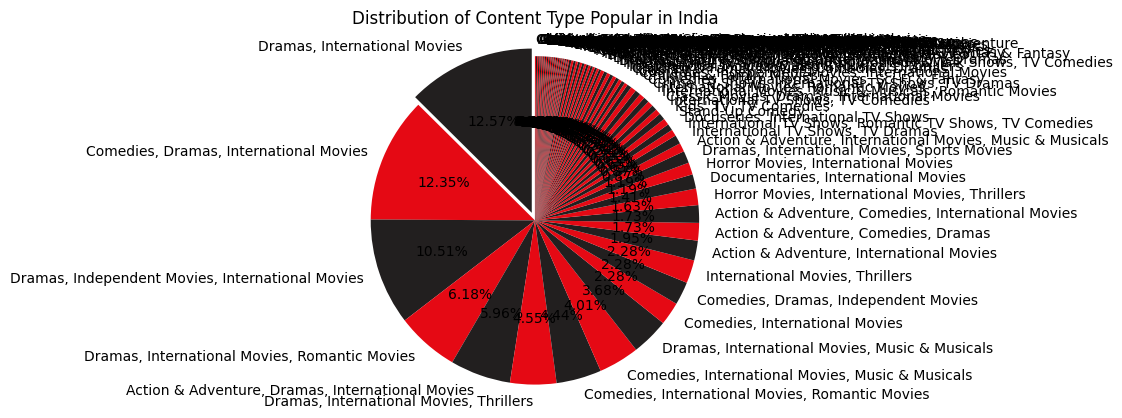

In [55]:
india = df[df["Country"] == "India"]

cont_type = india["Type"].value_counts()
cont_name = cont_type.index
cont_value = cont_type.values

# Create explode list with same length as number of slices
explode = [0.05 if i == 0 else 0 for i in range(len(cont_value))]

# Define colors (will repeat automatically if fewer than slices)
color = ["#221f1f", "#E50914"]

plt.pie(cont_value, labels=cont_name, autopct="%.2f%%", colors=color, explode=explode, startangle=90)
plt.axis("equal")
plt.title("Distribution of Content Type Popular in India")
plt.show()

### Most Popular Ratings in India

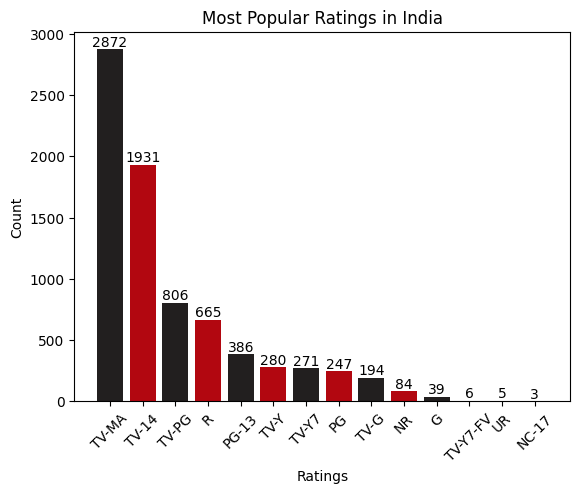

In [56]:
rat_type = df["Rating"].value_counts()
rat_name = rat_type.index
rat_value = rat_type.values

colors = ["#221f1f" if i % 2 == 0 else "#b20710" for i in range(len(rat_name))]

plt.bar(rat_name, rat_value, color = colors)
plt.xticks(rotation = 45)
plt.title("Most Popular Ratings in India")
plt.xlabel("Ratings")
plt.ylabel("Count")

for i, v in enumerate(rat_value):
    plt.text(i, v, str(v), ha = "center", va = "bottom")

plt.show()

### Longest Movie Duration

In [57]:
df_movie = df[df['Category'] == 'Movie'].copy()

df_movie['duration_value'] = df_movie['Duration'].str.split().str[0].astype(int)

df_movie = df_movie[df_movie['duration_value'] == df_movie['duration_value'].max()]

movie_name = df_movie['Title'].iloc[0]
year = df_movie['year_added'].iloc[0]

print(movie_name, "is the movie with the longest duration, released in the year", year)

Black Mirror: Bandersnatch is the movie with the longest duration, released in the year 2018


In [58]:
country = (
    df.loc[df.Country.notnull(), "Country"].astype("str").apply(lambda t: t.split(", "))
)

# Convert DataFrame column into list of strings
country = list(country)

# number of movies/TV shows without null values
len(country)

7789

In [59]:
# Instantiating the encoder and identifying the unique countries
encoder = TransactionEncoder().fit(country)

# One-hot encoding
onehot_country = encoder.transform(country)

# Convert one-hot encoded data to DataFrame and set show_id as index
onehot_country = pd.DataFrame(
    onehot_country,
    columns=encoder.columns_,
    index=df.loc[df.Country.notnull(), "Show_Id"],
)

# Print the one-hot encoded country dataset
onehot_country.head()

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Kingdom,"United Kingdom,",United States,"United States,",Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe
Show_Id,,,,,,,,,,,,,,,,,,,,,
s1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
s5,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [60]:
country_share = onehot_country.mean().sort_values(ascending=False).round(4) * 100
country_share

,0
United States,48.84
India,12.71
United Kingdom,9.27
Canada,5.29
France,4.48
...,...
Somalia,0.01
"United Kingdom,",0.01
Uganda,0.01
Vatican City,0.01


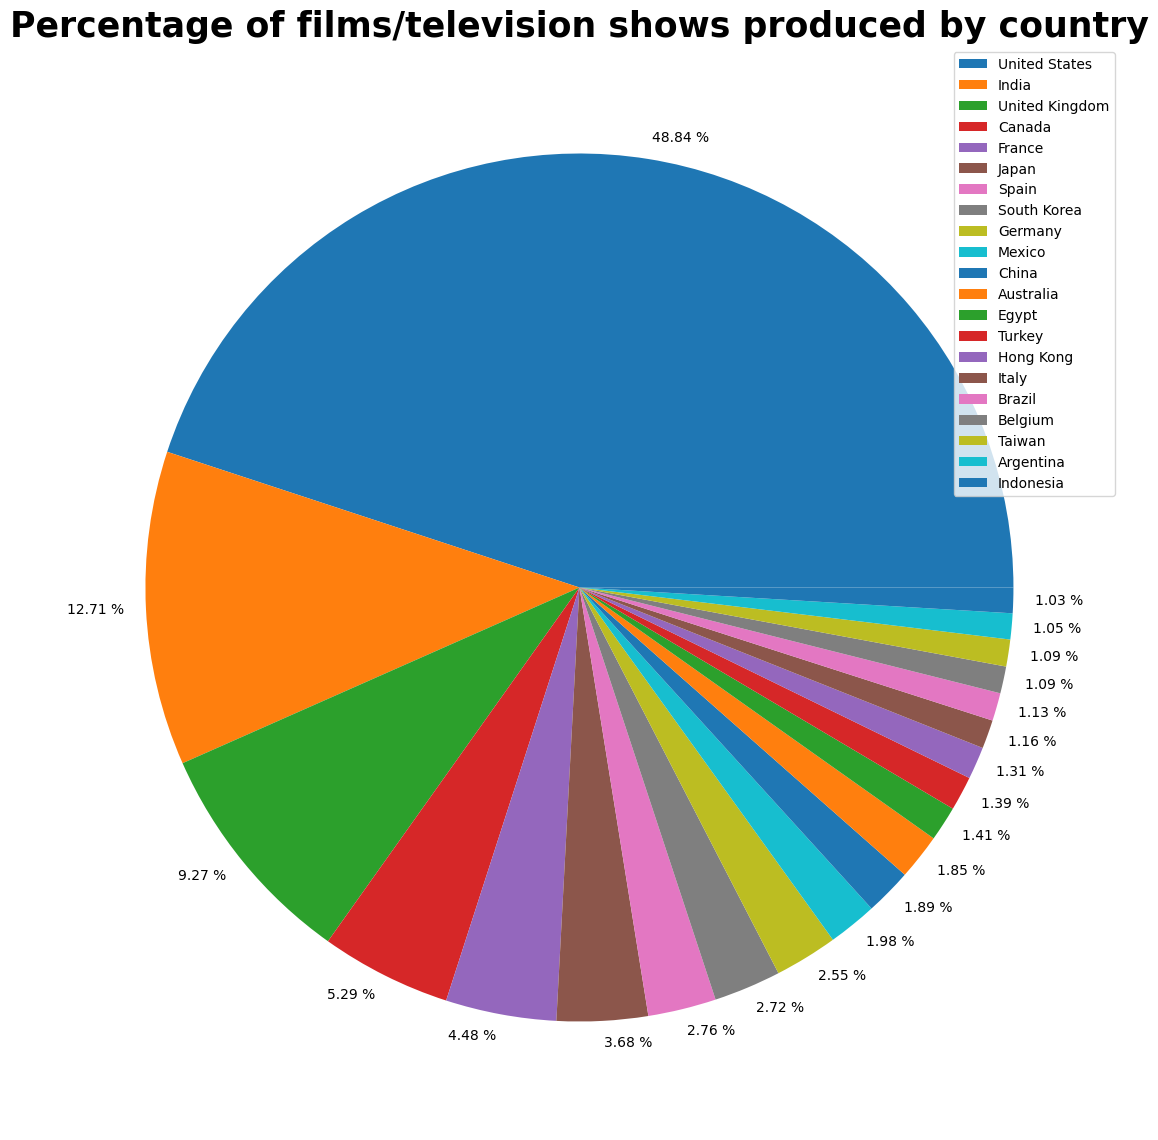

In [61]:
# Plotting the countries that share more than 1%
country_share = country_share[country_share > 1]
labels = country_share.round(3).astype("str") + " %"
fig1, ax1 = plt.subplots(figsize=(14, 40), facecolor="white")
ax1.pie(
    country_share,
    labels=labels,
    labeldistance=1.05,
    shadow=False,
)
plt.title(
    "Percentage of films/television shows produced by country",
    fontsize=25,
    fontweight="bold",
)
plt.legend(labels=country_share.index, loc="upper right")
plt.show()
